# 3) Data Splitting

In this notebook, we'll split the complete data set into training and test sets, ensuring that the two accurately represent the complete set.

*Note:* For copyright reasons, the database and exported CSV files are not included in this repository.

## Import the required modules.

In [1]:
import dataset
import pandas as pd

## Import the data.

In [2]:
db = dataset.connect("sqlite:///physical_properties.db")

In [3]:
query_terms = """
                SELECT Formula, Name, [CAS No], [Boil Pt (K)], SMILES, InChI
                FROM yaws_w_structures
                WHERE [Boil Pt (K)] <= 700 AND [Boil Pt (code)] <= 2 AND NOT (
                    SMILES LIKE '%F%' OR
                    SMILES LIKE '%Cl%' OR
                    SMILES LIKE '%Br%' OR
                    SMILES LIKE '%I%' OR
                    SMILES LIKE '%S%' OR
                    SMILES LIKE '%P')
                """
bp_data = pd.DataFrame(db.query(query_terms))
bp_data

,Formula,Name,CAS No,Boil Pt (K),SMILES,InChI
0,C9H18O,7-methyl-7-octen-1-ol,---,498.00,CC(=C)CCCCCCO,"InChI=1/C9H18O/c1-9(2)7-5-3-4-6-8-10/h10H,1,3-..."
1,C9H18O,cis-2-methyl-3-octen-2-ol,18521-07-8,498.00,CCCC\C=C/C(C)(C)O,"InChI=1/C9H18O/c1-4-5-6-7-8-9(2,3)10/h7-8,10H,..."
2,C9H18O,3-methyl-1-octen-3-ol,24089-00-7,498.00,CCCCCC(C)(O)C=C,"InChI=1/C9H18O/c1-4-6-7-8-9(3,10)5-2/h5,10H,2,..."
3,C9H18O,3-methyl-4-octen-3-ol,90676-55-4,498.00,CCCC=CC(C)(O)CC,"InChI=1/C9H18O/c1-4-6-7-8-9(3,10)5-2/h7-8,10H,..."
4,C9H18O,4-methyl-1-octen-4-ol,62108-06-9,498.00,CCCCC(C)(O)CC=C,"InChI=1/C9H18O/c1-4-6-8-9(3,10)7-5-2/h5,10H,2,..."
...,...,...,...,...,...,...
8769,C27H54,11-(cyclopentylmethyl)-uneicosane,6703-79-3,694.90,CCCCCCCCCCC(CCCCCCCCCC)CC1CCCC1,InChI=1/C27H54/c1-3-5-7-9-11-13-15-17-21-26(25...
8770,C27H57N,trinonylamine,2044-22-6,671.15,CCCCCCCCCN(CCCCCCCCC)CCCCCCCCC,InChI=1/C27H57N/c1-4-7-10-13-16-19-22-25-28(26...
8771,C28H58,7-hexyldocosane,55373-86-9,690.50,CCCCCCCCCCCCCCCC(CCCCCC)CCCCCC,InChI=1/C28H58/c1-4-7-10-13-14-15-16-17-18-19-...
8772,C28H58,9-octyleicosane,13475-77-9,690.50,CCCCCCCCCCCC(CCCCCCCC)CCCCCCCC,InChI=1/C28H58/c1-4-7-10-13-16-17-18-21-24-27-...


## Check for missing values
Let's review the data set for missing values. I want to manually read *all* of the entries with missing data to ensure that, for example, a particular functional group is frequently omitted.

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
bp_data[bp_data.isna().any(axis = 1)]

,Formula,Name,CAS No,Boil Pt (K),SMILES,InChI
1375,C10H22O,2-isopropoxy-heptane,---,456.55,CCCCCC(C)OC(C)C,None


In [6]:
# Restore the default number of visible rows before moving on.
pd.set_option('display.max_rows', 10)

There is only one row missing data. It is safe simply to drop that data point, as we won't be preferentially excluding a particular class of molecules.

In [7]:
bp_data = bp_data.dropna(how = "any")

## Create training and test sets.

To do this, we'll use `scikit-learn`'s function, `train_test_split()`. The data sets will contain only the structural code and the boiling point, not any of the functional group counts or other descriptors shown in the EDA.

In [8]:
# Shuffle the data entries three times, just for good measure.
for count in range(1, 4, 1):
    bp_data = bp_data.sample(frac = 1).reset_index(drop = True)

In [9]:
bp_data.head()

,Formula,Name,CAS No,Boil Pt (K),SMILES,InChI
0,C17H32,9-methyl-2-hexadecyne,---,572.06,CCCCCCCC(C)CCCCCC#CC,InChI=1/C17H32/c1-4-6-8-10-12-14-16-17(3)15-13...
1,C20H40,8-methyl-1-nonadecene,---,606.39,CCCCCCCCCCCC(C)CCCCCC=C,InChI=1/C20H40/c1-4-6-8-10-11-12-13-15-17-19-2...
2,C17H34O,"2,4-dimethylpentadecanal",---,600.82,CCCCCCCCCCCC(C)CC(C)C=O,InChI=1/C17H34O/c1-4-5-6-7-8-9-10-11-12-13-16(...
3,,"2,3,6-trimethylnaphthalene",829-26-5,536.70,Cc1ccc2cc(C)c(C)cc2c1,InChI=1/C13H14/c1-9-4-5-12-7-10(2)11(3)8-13(12...
4,,tetradecyl acetate,638-59-5,572.82,CCCCCCCCCCCCCCOC(C)=O,InChI=1/C16H32O2/c1-3-4-5-6-7-8-9-10-11-12-13-...


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = bp_data["SMILES"]
y = bp_data["Boil Pt (K)"]

In [12]:
# Split the data set into training and (test + validation) sets
x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, train_size = 0.7, random_state = 7)

Now we have the data set divided as follows: 70% training, 30% combined (test + validation).

Let's split the combined (test + validation) sets again with a split ratio of 0.5. This means that, ultimately, the entire data set will be used as follows:  70% training, 15% validation, and 15% test.

In [13]:
# Split the (test + validation) set again to give separate test and validation sets.
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, train_size = 0.5)

## Confirm uniform sampling between training, test, and validation sets.

First, let's take a look at the distribution visually via a histogram:

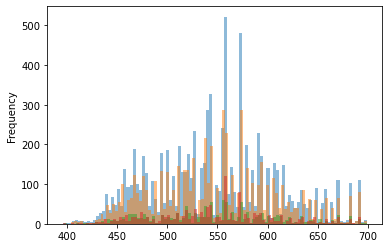

In [14]:
for source in [bp_data["Boil Pt (K)"], y_train, y_val, y_test]:
    hist = source.plot(kind = "hist", bins = 100, alpha = 0.5)

Qualitatively, these histograms suggest that each data subset is a fairly representative sample of the overall data set.

Now, let's take a look at the statistics for each:

In [15]:
for dataset in [bp_data["Boil Pt (K)"], y_train, y_val, y_test]:
    print(dataset.describe())
    print("")

count    8773.000000
mean      549.005626
std        61.578026
min       395.440000
25%       503.480000
50%       549.000000
75%       590.380000
max       699.180000
Name: Boil Pt (K), dtype: float64

count    6141.000000
mean      549.402488
std        61.640512
min       403.810000
25%       503.110000
50%       549.000000
75%       590.380000
max       699.180000
Name: Boil Pt (K), dtype: float64

count    1316.000000
mean      548.425752
std        61.997495
min       397.240000
25%       505.362500
50%       549.000000
75%       590.380000
max       699.180000
Name: Boil Pt (K), dtype: float64

count    1316.000000
mean      547.733579
std        60.886308
min       395.440000
25%       505.790000
50%       549.000000
75%       586.300000
max       692.990000
Name: Boil Pt (K), dtype: float64



Looks good! Having verified that the training, test, and validation sets are very similar to both one another and the original full data set, we can move on.

## Wrapping up.

We're ready to save the data sets for future use.

In [16]:
for dataset in ["x_train", "y_train", "x_val", "y_val", "x_test", "y_test"]:
    exec("{}.to_csv('data/{}-CHNO.csv', index = False)".format(dataset, dataset))